<a href="https://www.kaggle.com/code/arunjangir245/titanic-machine-learning-decisiontreeclassifier?scriptVersionId=141977065" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: center; background-color: #ccffcc; color: #006600; padding: 20px; border-radius: 5px;">
    <h2 style="margin: 0; font-size: 13px;">Don't forget to upvote if you liked the notebook</h2>
</div>


## Import Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the data

In [2]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Target Variable (Dependent Variable):
The target variable, also known as the dependent variable or objective variable, is the variable that you want to predict or explain. It is the outcome or result that you are interested in understanding or forecasting. 
Survived or Not ( consider 0 is not Survived & 1 is Survived)

## Independent Variables:
Independent variables, also known as predictor variables or features, are the variables that are used to explain or predict the target variable. They are the inputs to your prediction model and are assumed to influence or have a relationship with the target variable.
Other variables such as Pclass, age etc.

In [7]:
train_data['Survived'].value_counts().keys()

# Here this shows the categorical value which '0' and '1' , so if we want only categories we use .keys() method

Int64Index([0, 1], dtype='int64')

 Here this shows the categorical value which '0' and '1' , so if we want only categories we use .keys() method

## Visualization Using Matplotlib

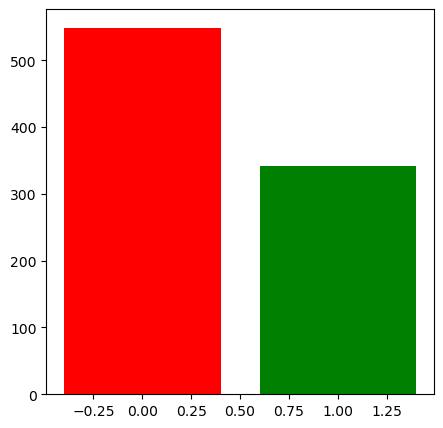

In [8]:
plt.figure(figsize=(5,5))

plt.bar(list(train_data["Survived"].value_counts().keys()),list(train_data["Survived"].value_counts()),color=["r","g"])

plt.show()

## Pclass - Ticket class 1st , 2nd and 3rd

In [9]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train_data['Pclass'].value_counts().keys()

Int64Index([3, 1, 2], dtype='int64')

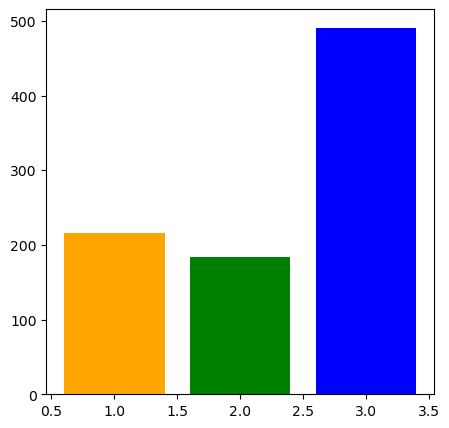

In [11]:
plt.figure(figsize=(5,5))

plt.bar(list(train_data["Pclass"].value_counts().keys()),list(train_data["Pclass"].value_counts()),color=["blue","orange","green"])

plt.show()

In [12]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
train_data['Sex'].value_counts().keys()

Index(['male', 'female'], dtype='object')

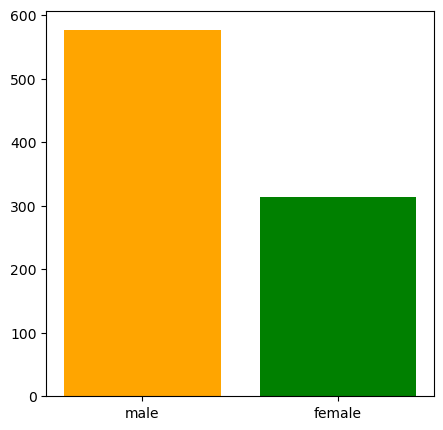

In [14]:
plt.figure(figsize=(5,5))

plt.bar(list(train_data["Sex"].value_counts().keys()),list(train_data["Sex"].value_counts()),color=["orange","green"])

plt.show()

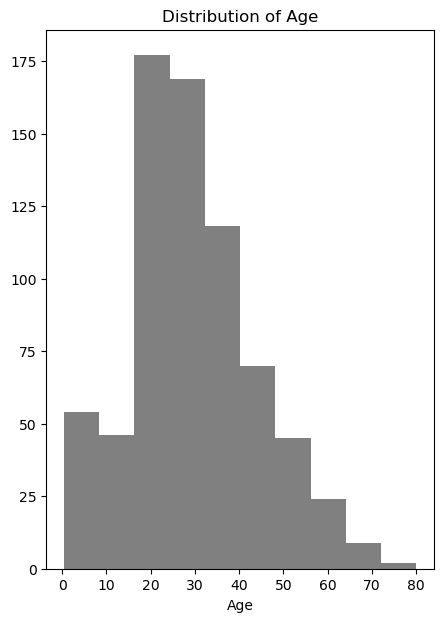

In [15]:
plt.figure(figsize=(5,7))
plt.hist(train_data["Age"],color="grey")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

## Data Visualization using Seaborn

<Axes: xlabel='Survived', ylabel='count'>

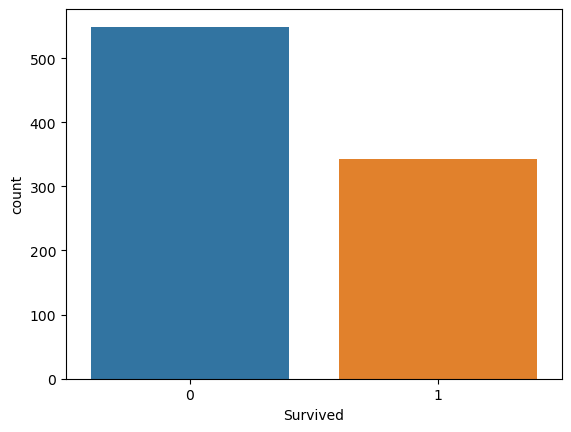

In [16]:
sns.countplot(x="Survived",data=train_data)

<Axes: xlabel='Count', ylabel='Age'>

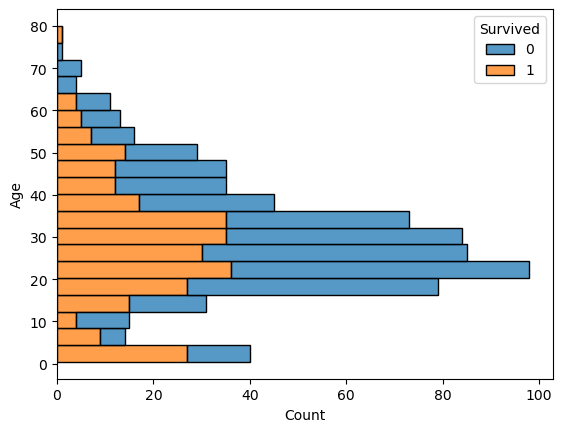

In [17]:
sns.histplot(y=train_data["Age"],hue=train_data["Survived"],multiple="stack")

<Axes: xlabel='Sex', ylabel='Age'>

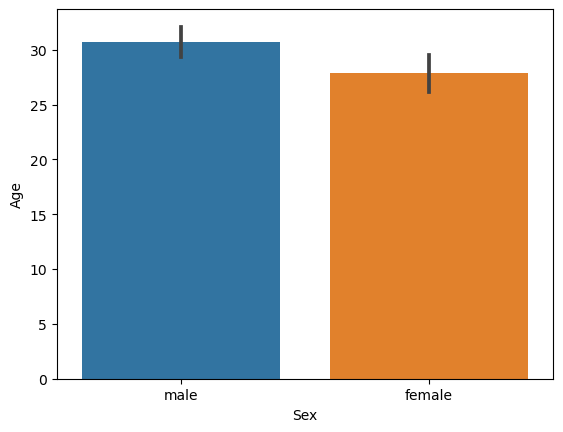

In [18]:
sns.barplot(x='Sex',y='Age',data=train_data)

#sns.barplot(x='category_variable', y='numeric_variable', data=data)

<Axes: xlabel='Survived', ylabel='Age'>

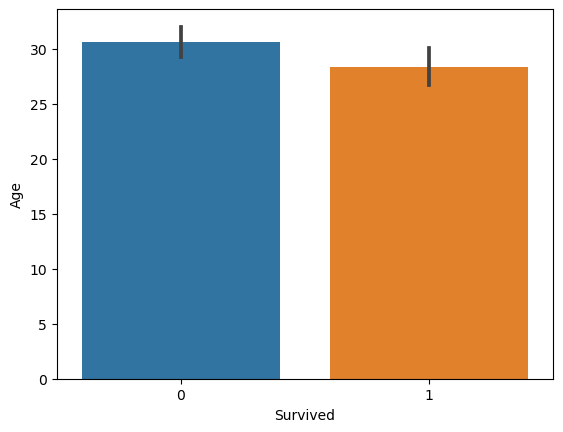

In [19]:

sns.barplot(x='Survived',y='Age',data=train_data)

<Axes: xlabel='Pclass', ylabel='Age'>

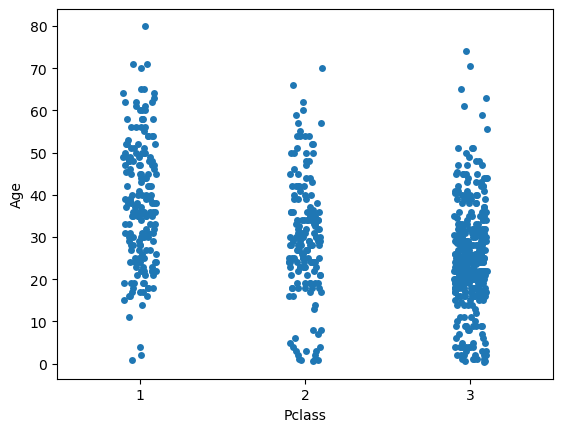

In [20]:
sns.stripplot(x='Pclass', y='Age', data=train_data)

In [21]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Preprocess the training data

In [22]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

## Preprocess the test data

In [23]:
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
test_data['Sex'] = LabelEncoder().fit_transform(test_data['Sex'])

## Extract the first letter of the 'Cabin' column and encode it using one-hot encoding

In [24]:
train_data['Cabin'] = train_data['Cabin'].str[0]
train_data = pd.get_dummies(train_data, columns=['Cabin'])

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin_A   891 non-null    uint8  
 8   Cabin_B   891 non-null    uint8  
 9   Cabin_C   891 non-null    uint8  
 10  Cabin_D   891 non-null    uint8  
 11  Cabin_E   891 non-null    uint8  
 12  Cabin_F   891 non-null    uint8  
 13  Cabin_G   891 non-null    uint8  
 14  Cabin_T   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 55.8 KB


## Handling Missing values of Training Dataset

In [26]:
imputer = KNNImputer(n_neighbors=5)
train_data[['Age', 'Fare']] = imputer.fit_transform(train_data[['Age', 'Fare']])



## Handling Missing values of Test Dataset

In [27]:

test_data[['Age', 'Fare']] = imputer.fit_transform(test_data[['Age', 'Fare']])

## Align the columns in the test data with the training data

In [28]:
test_data['Cabin'] = test_data['Cabin'].str[0]
test_data = pd.get_dummies(test_data, columns=['Cabin'])
missing_columns = set(train_data.columns) - set(test_data.columns)
for column in missing_columns:
    test_data[column] = 0

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin_A   891 non-null    uint8  
 8   Cabin_B   891 non-null    uint8  
 9   Cabin_C   891 non-null    uint8  
 10  Cabin_D   891 non-null    uint8  
 11  Cabin_E   891 non-null    uint8  
 12  Cabin_F   891 non-null    uint8  
 13  Cabin_G   891 non-null    uint8  
 14  Cabin_T   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 55.8 KB


## Building Dependent and Independent variable

In [30]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

## Building model  (LogisticRegression)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [32]:
model = DecisionTreeClassifier(random_state=42)

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Predicting values on training data

In [34]:
y_train_pred = model.predict(X_train)

## Calculate accuracy on the training data

In [35]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_accuracy)

Accuracy: 0.9865319865319865


## Predicting values on test data

In [36]:
test_data.drop('Survived', axis=1, inplace=True)

In [37]:
predictions = model.predict(test_data)

In [38]:
passenger_ids = pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId']
output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predictions})

In [39]:
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


## Save the predictions to a CSV file

In [40]:
output.to_csv('predictions_DecisionTreeClassifier.csv', index=False)